In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### "Tamir_Van_TShirt-Elbise_240820.v4." Dosyasının Okunması

In [10]:
# Veri kümesini oku
df = pd.read_csv('Tamir_Van_TShirt-Elbise_240820.v4.csv', sep=';')
# Belirli kolonları seçmek için
selected_columns = ['ModelID','SipID','HataAdi','HataAdedi','Tarih'] 
print(len(df))

2435


In [11]:
df[selected_columns].head()

,ModelID,SipID,HataAdi,HataAdedi,Tarih
0,297,275,1.KALİTE,516,2023-12-13
1,297,275,KAPTIRMA,1,2023-12-13
2,297,275,PATLAK,1,2023-12-13
3,297,275,KAPTIRMA,2,2023-12-13
4,297,275,1.KALİTE,117,2023-12-13


### "HataAdi" kolonu 1.KALİTE ve 2.KALİTE olan satırları çıkarma

In [12]:
df = df[~df['HataAdi'].isin(['1.KALİTE', '2.KALİTE'])]

# Sonuçları yazdırma
print(len(df))

1661


In [13]:
df[selected_columns].head()

,ModelID,SipID,HataAdi,HataAdedi,Tarih
1,297,275,KAPTIRMA,1,2023-12-13
2,297,275,PATLAK,1,2023-12-13
3,297,275,KAPTIRMA,2,2023-12-13
5,297,275,KUMAŞ LEKE,2,2023-12-13
6,297,275,KAPTIRMA,1,2024-01-16


In [14]:
print(df['HataAdedi'].value_counts())

HataAdedi
1      1055
2       272
3       112
4        58
5        43
6        28
7        14
11       13
8        11
9         9
14        6
10        5
12        4
18        3
13        3
19        3
17        2
25        2
20        2
15        2
29        2
26        2
16        1
108       1
32        1
22        1
24        1
84        1
45        1
21        1
23        1
43        1
Name: count, dtype: int64


### "Siparis_240820.v4" Dosyasının Okunması

In [15]:
# Veri kümesini oku
df_siparis = pd.read_csv('Siparis_240820.v4.csv', sep=';')
# Belirli kolonları seçmek için
selected_columns_2 = ['MES_ModelID','SIPARIS_ADEDI','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI'] 
print(len(df_siparis))

35


In [16]:
df_siparis[selected_columns_2].head()

,MES_ModelID,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI
0,298,14292,ÇOCUK,T-Shirt,Kısa Kol
1,297,32073,BAYAN,T-Shirt,Uzun Kol
2,300,15870,BAYAN,T-Shirt,Kısa Kol
3,307,14170,ÇOCUK,Sweatshirt,Kapşonsuz
4,309,22113,ÇOCUK,Elbise,3/4 kol


### İki Dosyanın Birleştirilmesi

In [17]:
# DataFrame'leri MES_ModelID ve ModelID kolonları üzerinden birleştirme
merged_df = pd.merge(df_siparis[selected_columns_2], df[selected_columns], left_on='MES_ModelID', right_on='ModelID', how='inner')

# ModelID kolonunu DataFrame'den çıkarma
merged_df = merged_df.drop(columns=['MES_ModelID'])

# Birleştirilmiş DataFrame'i gösterme
merged_df.head()

,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,ModelID,SipID,HataAdi,HataAdedi,Tarih
0,14292,ÇOCUK,T-Shirt,Kısa Kol,298,276,DİKİŞ DÜŞMESİ,1,2023-12-19
1,14292,ÇOCUK,T-Shirt,Kısa Kol,298,276,KUMAŞ LEKE,2,2023-12-20
2,14292,ÇOCUK,T-Shirt,Kısa Kol,298,276,DİKİŞ DÜŞMESİ,1,2023-12-20
3,14292,ÇOCUK,T-Shirt,Kısa Kol,298,276,RENK FARKI,1,2023-12-20
4,14292,ÇOCUK,T-Shirt,Kısa Kol,298,276,KUMAŞ LEKE,2,2024-01-03


### ID bilgileri kategorik veriye dönüştürüldü.

In [18]:
categorical_columns = ['ModelID', 'SipID']

merged_df[categorical_columns] = merged_df[categorical_columns].astype('category')
merged_df['Tarih'] = pd.to_datetime(merged_df['Tarih']).dt.strftime('%Y-%m-%d')

print(merged_df.dtypes)

SIPARIS_ADEDI            int64
GIYSI_GRUBU             object
GIYSI_CINSI             object
GIYSI_CINSI_DETAYI      object
ModelID               category
SipID                 category
HataAdi                 object
HataAdedi                int64
Tarih                   object
dtype: object


### NULL değerler temizlendi.

In [19]:
# Her kolonda kaç tane NA (eksik) değer olduğunu hesapla
na_counts = merged_df.isna().sum()

# En az bir NA değeri olan satır sayısını hesapla
rows_with_na = merged_df.isna().any(axis=1).sum()

# Sonuçları yazdır
print("Kolonlardaki NA sayıları:")
print(na_counts)
print("\nNA değerleri nedeniyle çıkarılacak satır sayısı:", rows_with_na)
#df = df[df['BirimUretimZamani'] <= 200]
merged_df = merged_df.dropna()


merged_df = merged_df.sort_values(by='HataAdedi',ascending=False)
merged_df.head()


Kolonlardaki NA sayıları:
SIPARIS_ADEDI         0
GIYSI_GRUBU           0
GIYSI_CINSI           0
GIYSI_CINSI_DETAYI    0
ModelID               0
SipID                 0
HataAdi               0
HataAdedi             0
Tarih                 0
dtype: int64

NA değerleri nedeniyle çıkarılacak satır sayısı: 0


,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,ModelID,SipID,HataAdi,HataAdedi,Tarih
1479,13392,BAYAN,T-Shirt,Kısa Kol,389,365,KUMAŞ LEKE,108,2024-06-04
409,22113,ÇOCUK,Elbise,3/4 kol,309,287,AKSESUAR HATASI,84,2024-01-30
259,15870,BAYAN,T-Shirt,Kısa Kol,300,278,KUMAŞ LEKE,45,2024-01-04
1495,13392,BAYAN,T-Shirt,Kısa Kol,389,365,KUMAŞ LEKE,43,2024-06-03
1456,13392,BAYAN,T-Shirt,Kısa Kol,389,365,KUMAŞ LEKE,32,2024-06-05


In [20]:
merged_df.to_csv("hata_adedi_duzenlenmis.csv",index=False)

### Kategorik Değişkenlerin Görselleştirilmesi

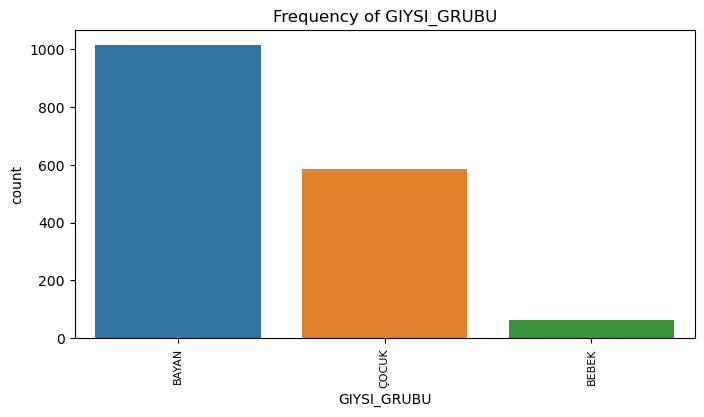

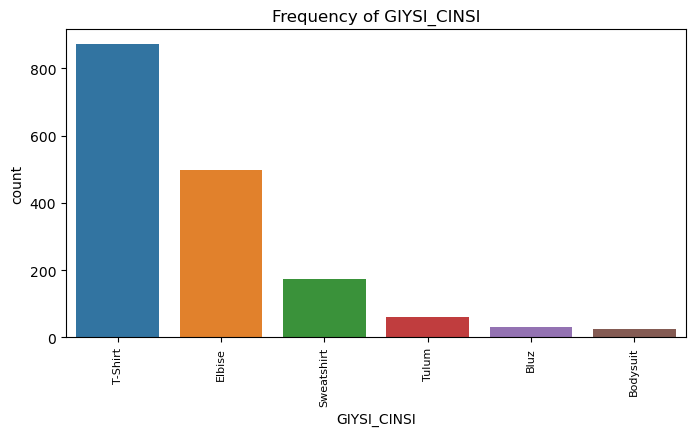

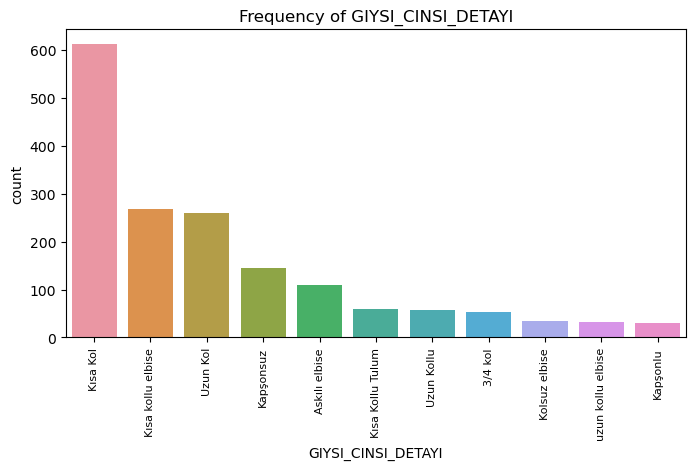

'ModelID' kolonunda '318' kategorisi sadece 13 kez tekrar ediyor.
'ModelID' kolonunda '447' kategorisi sadece 12 kez tekrar ediyor.
'ModelID' kolonunda '388' kategorisi sadece 8 kez tekrar ediyor.
'ModelID' kolonunda '408' kategorisi sadece 8 kez tekrar ediyor.
'ModelID' kolonunda '313' kategorisi sadece 6 kez tekrar ediyor.
'ModelID' kolonunda '360' kategorisi sadece 3 kez tekrar ediyor.


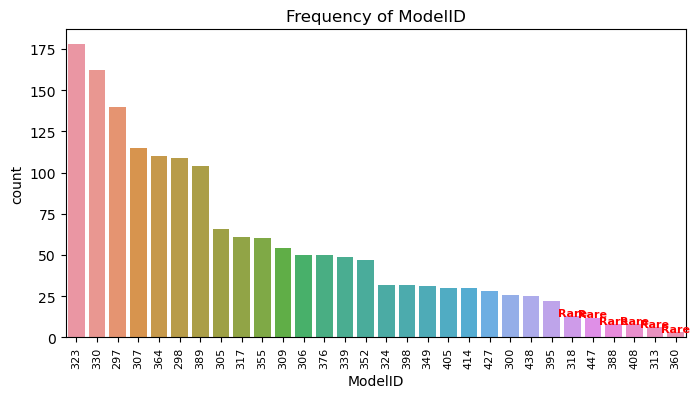

'SipID' kolonunda '296' kategorisi sadece 13 kez tekrar ediyor.
'SipID' kolonunda '1423' kategorisi sadece 12 kez tekrar ediyor.
'SipID' kolonunda '364' kategorisi sadece 8 kez tekrar ediyor.
'SipID' kolonunda '385' kategorisi sadece 8 kez tekrar ediyor.
'SipID' kolonunda '291' kategorisi sadece 6 kez tekrar ediyor.
'SipID' kolonunda '336' kategorisi sadece 3 kez tekrar ediyor.


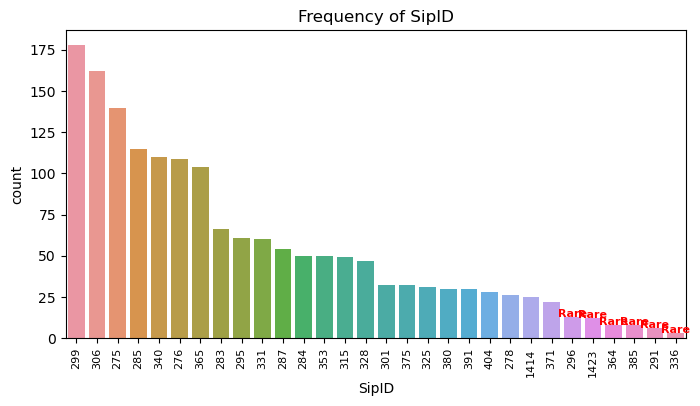

'HataAdi' kolonunda 'RENK FARKI' kategorisi sadece 14 kez tekrar ediyor.
'HataAdi' kolonunda 'AKSESUAR HATASI' kategorisi sadece 13 kez tekrar ediyor.
'HataAdi' kolonunda 'BÜZGÜ DAĞILIMI' kategorisi sadece 12 kez tekrar ediyor.
'HataAdi' kolonunda 'METO' kategorisi sadece 11 kez tekrar ediyor.
'HataAdi' kolonunda 'NAKIS HATASI' kategorisi sadece 9 kez tekrar ediyor.
'HataAdi' kolonunda 'DİKİM DEFOSU' kategorisi sadece 9 kez tekrar ediyor.
'HataAdi' kolonunda 'İP' kategorisi sadece 8 kez tekrar ediyor.
'HataAdi' kolonunda 'PİS PAY' kategorisi sadece 6 kez tekrar ediyor.
'HataAdi' kolonunda 'DARLI-GENİŞLİ DİKİM' kategorisi sadece 5 kez tekrar ediyor.
'HataAdi' kolonunda 'REGULA' kategorisi sadece 2 kez tekrar ediyor.


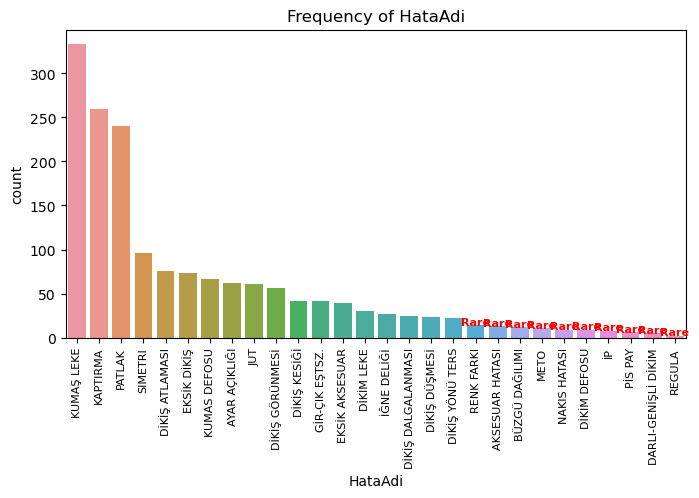

'Tarih' kolonunda '2024-06-04' kategorisi sadece 19 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-11' kategorisi sadece 19 kez tekrar ediyor.
'Tarih' kolonunda '2024-02-29' kategorisi sadece 18 kez tekrar ediyor.
'Tarih' kolonunda '2024-01-03' kategorisi sadece 18 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-05' kategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2024-01-02' kategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2024-06-05' kategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2024-02-19' kategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2023-12-29' kategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-12' kategorisi sadece 16 kez tekrar ediyor.
'Tarih' kolonunda '2024-04-29' kategorisi sadece 16 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-15' kategorisi sadece 16 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-13' kategorisi sadece 16 kez tekrar ediyor.
'Tarih' kolonunda '2023-12-21' kategorisi sadece 16 kez tekrar ediyor.
'Tarih

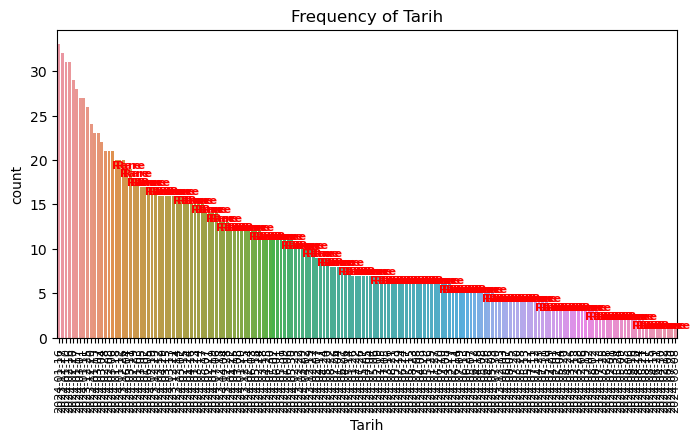

CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = merged_df  # df değişkeni varsayılan olarak DataFrame olarak alınmıştır.

# Kategorik ve numerik değişkenleri ayırma
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Eşik değeri (threshold) belirleyin
threshold = 20

# Nadir kategorileri saklamak için bir liste oluşturun
rare_categories_list = []

# Kategorik değişkenlerin frekans grafikleri ve nadir kategorilerin işaretlenmesi
for col in categorical_columns:
    plt.figure(figsize=(8, 4))  # Grafik boyutunu ayarlayın
    value_counts = df_filtered[col].value_counts()
    sns.countplot(x=col, data=df_filtered, order=value_counts.index)
    
    # Nadir kategorileri işaretle ve listeye ekle
    rare_categories = value_counts[value_counts < threshold]
    for rare_cat in rare_categories.index:
        print(f"'{col}' kolonunda '{rare_cat}' kategorisi sadece {rare_categories[rare_cat]} kez tekrar ediyor.")
        plt.text(x=list(value_counts.index).index(rare_cat), y=rare_categories[rare_cat] + 0.1, s='Rare',
                 color='red', ha='center', fontsize=8, fontweight='bold')
        
        # Nadir kategoriyi ve kaç kez tekrar ettiğini bir listeye kaydet
        rare_categories_list.append({
            'Column': col,
            'Category': rare_cat,
            'Frequency': rare_categories[rare_cat]
        })
    
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

# Nadir kategorileri içeren DataFrame oluşturun
rare_categories_df = pd.DataFrame(rare_categories_list)

# Category_Sorted sütununu eklerken sayısal değerlerin öncelikli sıralanmasını sağlayın
def sort_categories(category):
    try:
        # Eğer kategori sayısal bir değerse önce sayısal olarak sırala
        return float(category)
    except ValueError:
        # Değilse alfabetik olarak sırala
        return category

rare_categories_df['Category_Sorted'] = rare_categories_df['Category'].apply(sort_categories)

# 1. CSV: Kolon, Kategori (Sayısal ise küçükten büyüğe, alfabetik sıralı), Frequency'e göre sıralı
sorted_by_column_category = rare_categories_df.sort_values(by=['Column', 'Category_Sorted', 'Frequency'])
sorted_by_column_category.to_csv('hata_adedi_sorted_by_column_category.csv', index=False)

# 2. CSV: Önce Frequency'e, sonra Kolon ve Kategori'ye göre sıralı
sorted_by_frequency = rare_categories_df.sort_values(by=['Frequency', 'Column', 'Category_Sorted'])
sorted_by_frequency.to_csv('hata_adedi_sorted_by_frequency.csv', index=False)

print("CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'")


### Sayısal değişkenlerin görselleştirilmesi

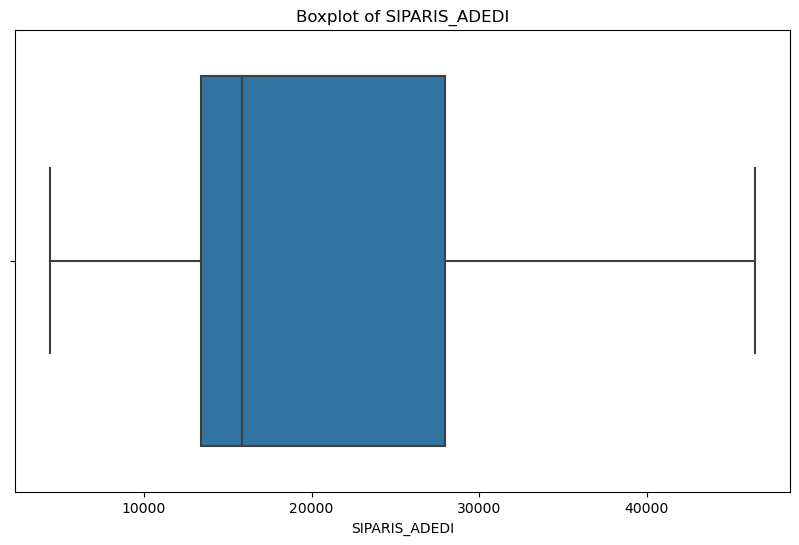

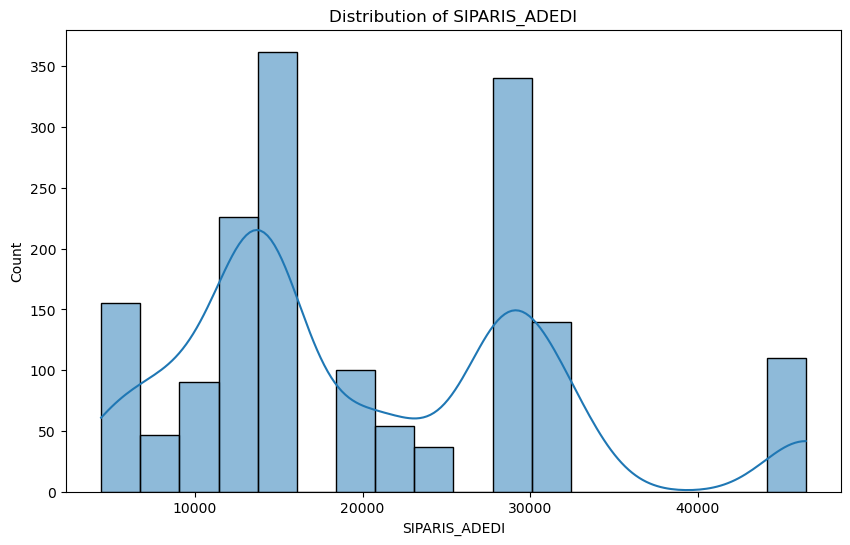

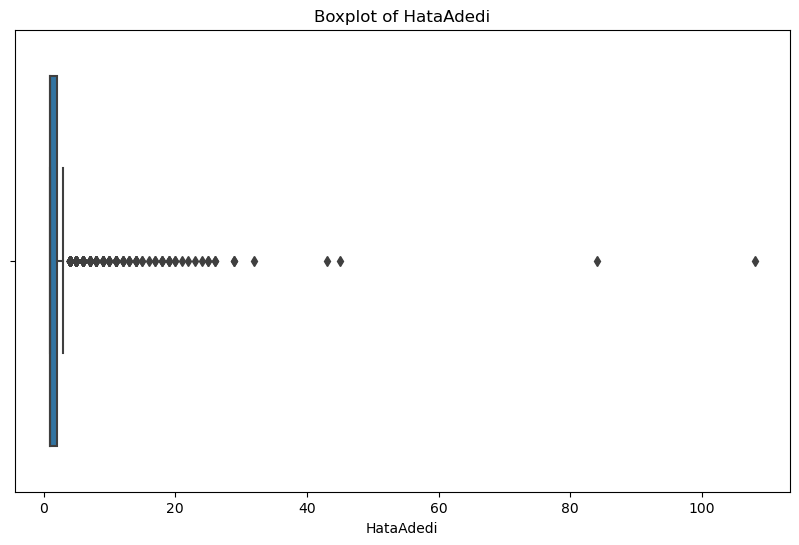

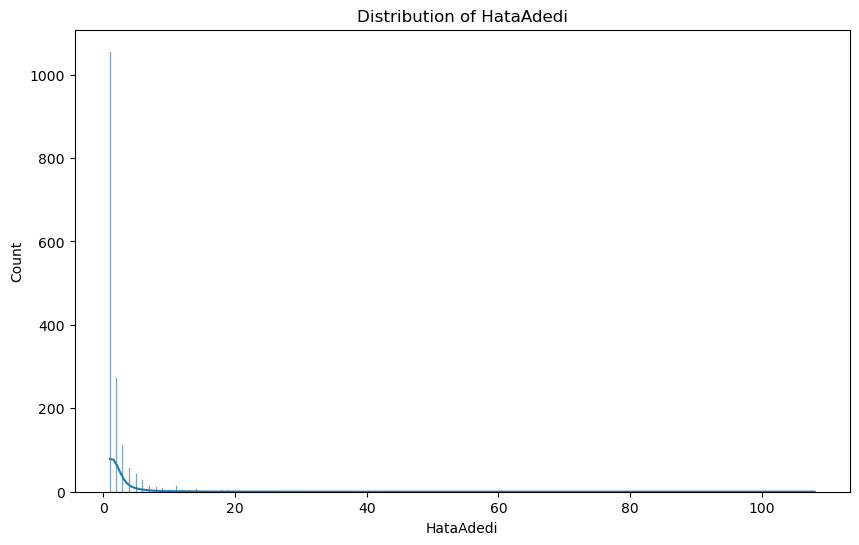

In [22]:
# Numerik değişkenlerin boxplot ve dağılım grafiklerini çiz
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    # Dağılım grafiği
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtered[col], kde=True, bins='auto')
    plt.title(f'Distribution of {col}')
    plt.show()


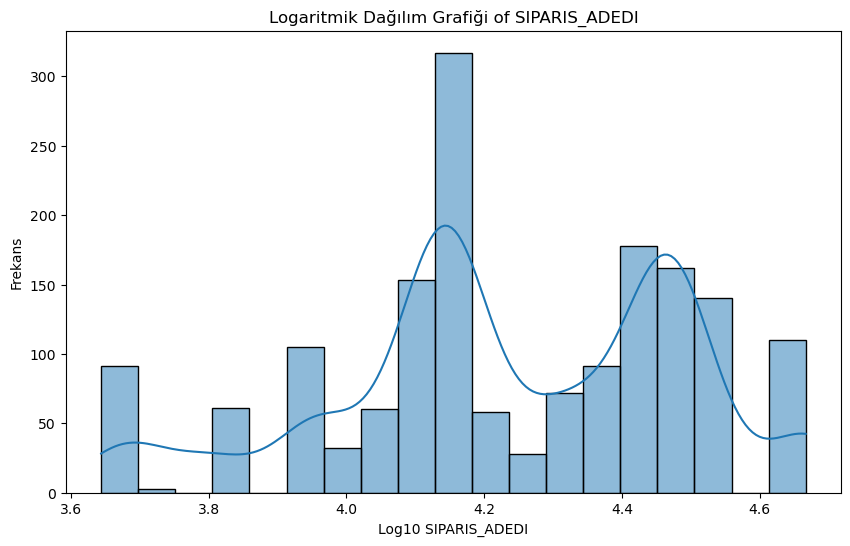

In [23]:
# HataAdedi verisini alın
data = df_filtered['SIPARIS_ADEDI']

# Logaritmik dönüşüm: Log10(x + 1) (0 değerlerini işlemede sıkıntı olmaması için +1 eklenir)
log_data = np.log10(data + 1)

# Logaritmik dönüşümlü verinin dağılım grafiğini çiz
plt.figure(figsize=(10, 6))
sns.histplot(log_data, kde=True, bins='auto')
plt.title('Logaritmik Dağılım Grafiği of SIPARIS_ADEDI')
plt.xlabel('Log10 SIPARIS_ADEDI')
plt.ylabel('Frekans')
plt.show()

### Korelasyon Matrisi

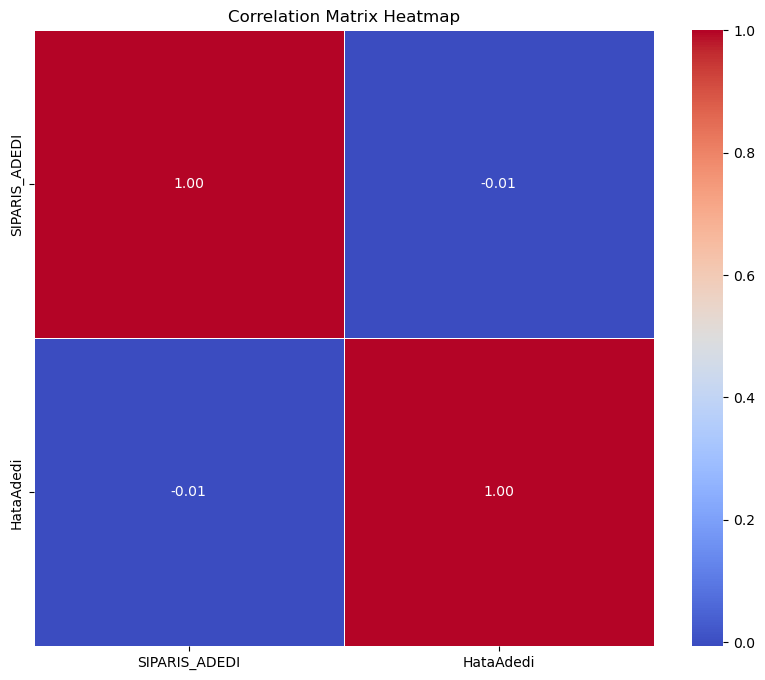

In [24]:
numerical_data = df_filtered.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplayalım
correlation_matrix = numerical_data.corr()

# Isı haritasını çizelim
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

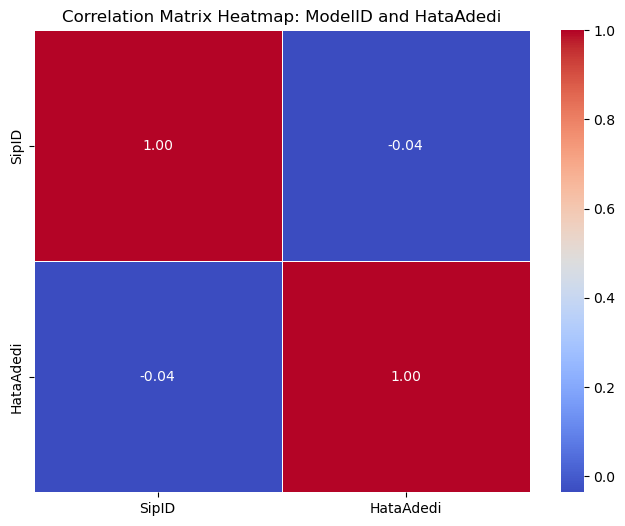

In [25]:
# Sadece numerik verileri ve ModelID'yi seçelim
numerical_data = df_filtered[['SipID', 'HataAdedi']]

# Korelasyon matrisini hesaplayalım
correlation_matrix = numerical_data.corr()

# Isı haritasını çizelim
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap: ModelID and HataAdedi')
plt.show()

C:\Users\berk_\AppData\Local\Temp\ipykernel_2788\3680494725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['HataAdi_Encoded'] = le.fit_transform(df_filtered['HataAdi'])


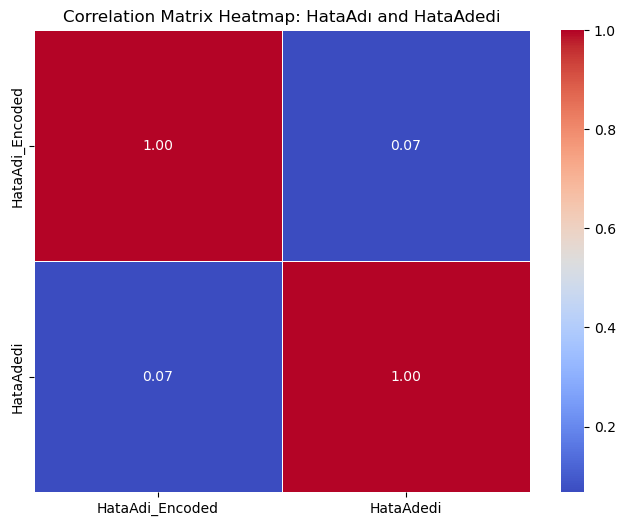

In [92]:
# HataAdı'nı sayısal bir formata dönüştürmek için LabelEncoder kullanıyoruz
le = LabelEncoder()
df_filtered['HataAdi_Encoded'] = le.fit_transform(df_filtered['HataAdi'])

# HataAdedi ile HataAdı_Encoded arasındaki verileri seçelim
numerical_data = df_filtered[['HataAdi_Encoded', 'HataAdedi']]

# Korelasyon matrisini hesaplayalım
correlation_matrix = numerical_data.corr()

# Isı haritasını çizelim
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap: HataAdı and HataAdedi')
plt.show()

### En sık tekrar eden görselleştirmeler 

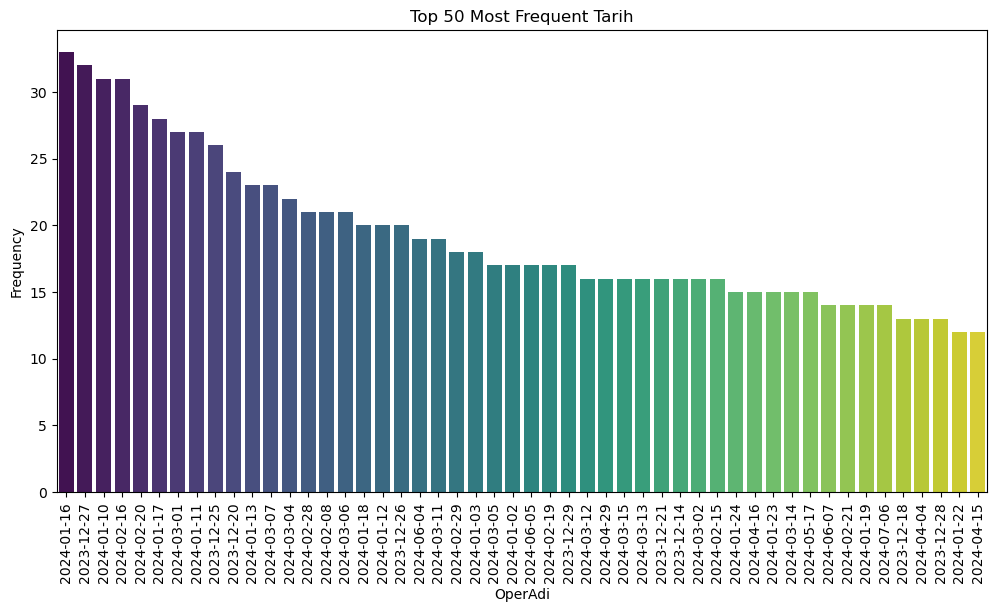

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# En sık görülen ilk 20 'OperAdi' değerini seç
top_20_operadi = df_filtered['Tarih'].value_counts().nlargest(50)

# Frekans grafiğini oluştur
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_operadi.index, y=top_20_operadi.values, palette='viridis')
plt.title('Top 50 Most Frequent Tarih')
plt.xticks(rotation=90, fontsize=10)  # X eksenindeki etiketleri döndür ve boyutunu küçült
plt.ylabel('Frequency')
plt.xlabel('OperAdi')
plt.show()

## -----------------------------------------------------------------------------------------------------------------------------

# Outlier'ların Temizlenmesi 

In [84]:
import pandas as pd

# Numerik kolonları seçme
numeric_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Outlier'ları tespit etmek için IQR yöntemini kullanma
Q1 = df_filtered[numeric_columns].quantile(0.25)
Q3 = df_filtered[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Outlier'ların dışındaki değerleri filtreleme
df_filtered_no_outlier = df_filtered[~((df_filtered[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_filtered[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Toplam çıkarılan satır sayısını hesaplama
rows_removed = df_filtered.shape[0] - df_filtered_no_outlier.shape[0]

# Çıkarılan satır sayısını yazdırma
print(f"Toplam {rows_removed} adet satır çıkarıldı.")

# df_filtered artık outlier'lardan arındırılmış verileri içerir.
df_filtered = df_filtered_no_outlier

Toplam 222 adet satır çıkarıldı.


In [27]:
import pandas as pd

# 'HataAdedi' kolonunun IQR'ını hesaplama
Q1 = df_filtered['HataAdedi'].quantile(0.25)
Q3 = df_filtered['HataAdedi'].quantile(0.75)
IQR = Q3 - Q1

# 'HataAdedi' kolonunda outlier olan satırları filtreleme
df_filtered_no_outlier = df_filtered[~((df_filtered['HataAdedi'] < (Q1 - 1.5 * IQR)) | 
                                       (df_filtered['HataAdedi'] > (Q3 + 1.5 * IQR)))]

# Toplam çıkarılan satır sayısını hesaplama
rows_removed = df_filtered.shape[0] - df_filtered_no_outlier.shape[0]

# Çıkarılan satır sayısını yazdırma
print(f"Toplam {rows_removed} adet satır çıkarıldı.")

# df_filtered artık sadece 'HataAdedi' sütunundaki outlier'lardan arındırılmış verileri içerir.
df_filtered = df_filtered_no_outlier

Toplam 222 adet satır çıkarıldı.


## Outlierlar atıldıktan sonra kategorik değişkenlerin görselleştirilmesi

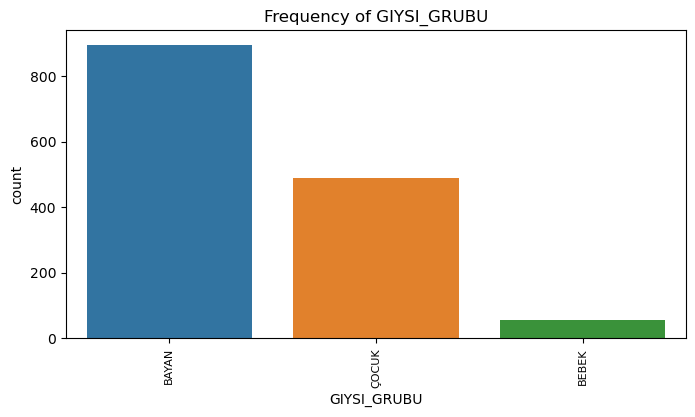

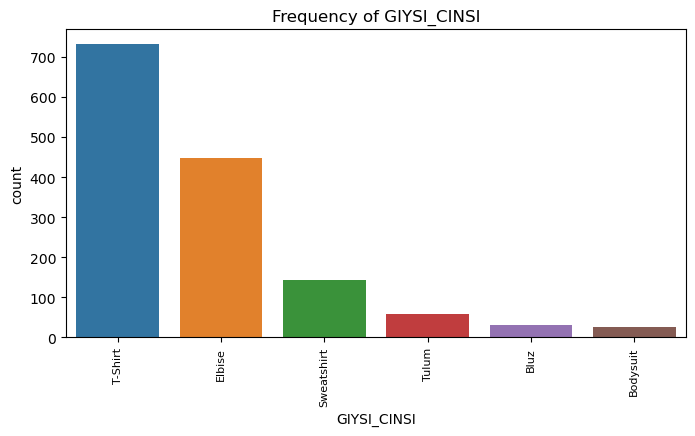

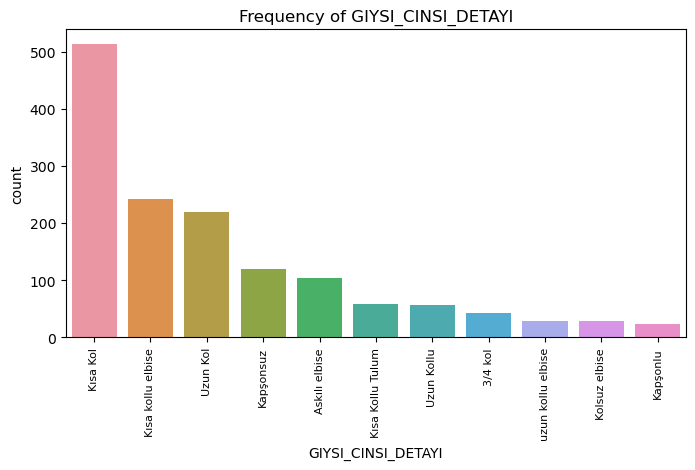

'HataAdi' kolonunda 'DİKİŞ YÖNÜ TERS'  fkategorisi sadece 17 kez tekrar ediyor.
'HataAdi' kolonunda 'BÜZGÜ DAĞILIMI'  fkategorisi sadece 11 kez tekrar ediyor.
'HataAdi' kolonunda 'AKSESUAR HATASI'  fkategorisi sadece 11 kez tekrar ediyor.
'HataAdi' kolonunda 'RENK FARKI'  fkategorisi sadece 11 kez tekrar ediyor.
'HataAdi' kolonunda 'METO'  fkategorisi sadece 10 kez tekrar ediyor.
'HataAdi' kolonunda 'DİKİM DEFOSU'  fkategorisi sadece 9 kez tekrar ediyor.
'HataAdi' kolonunda 'İP'  fkategorisi sadece 7 kez tekrar ediyor.
'HataAdi' kolonunda 'NAKIS HATASI'  fkategorisi sadece 6 kez tekrar ediyor.
'HataAdi' kolonunda 'PİS PAY'  fkategorisi sadece 6 kez tekrar ediyor.
'HataAdi' kolonunda 'DARLI-GENİŞLİ DİKİM'  fkategorisi sadece 5 kez tekrar ediyor.
'HataAdi' kolonunda 'REGULA'  fkategorisi sadece 2 kez tekrar ediyor.


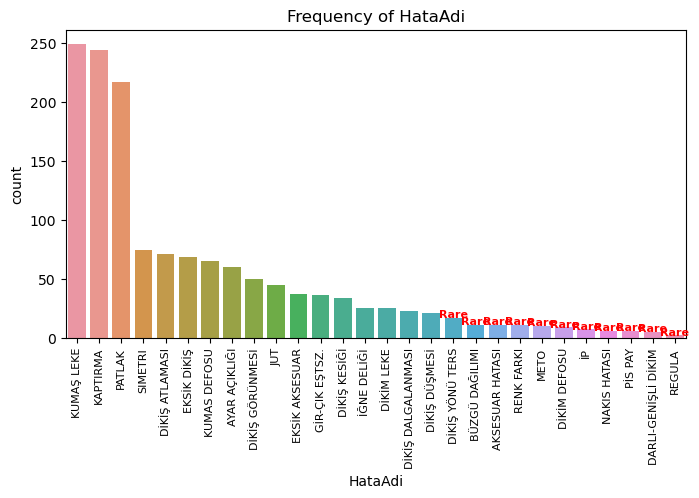

'Tarih' kolonunda '2024-03-04'  fkategorisi sadece 19 kez tekrar ediyor.
'Tarih' kolonunda '2024-02-28'  fkategorisi sadece 18 kez tekrar ediyor.
'Tarih' kolonunda '2024-01-12'  fkategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-11'  fkategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2024-02-08'  fkategorisi sadece 17 kez tekrar ediyor.
'Tarih' kolonunda '2024-06-04'  fkategorisi sadece 16 kez tekrar ediyor.
'Tarih' kolonunda '2024-02-29'  fkategorisi sadece 16 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-15'  fkategorisi sadece 16 kez tekrar ediyor.
'Tarih' kolonunda '2024-04-16'  fkategorisi sadece 15 kez tekrar ediyor.
'Tarih' kolonunda '2024-04-29'  fkategorisi sadece 15 kez tekrar ediyor.
'Tarih' kolonunda '2024-02-19'  fkategorisi sadece 15 kez tekrar ediyor.
'Tarih' kolonunda '2024-05-17'  fkategorisi sadece 15 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-14'  fkategorisi sadece 15 kez tekrar ediyor.
'Tarih' kolonunda '2024-03-02'  fkategorisi sadece 

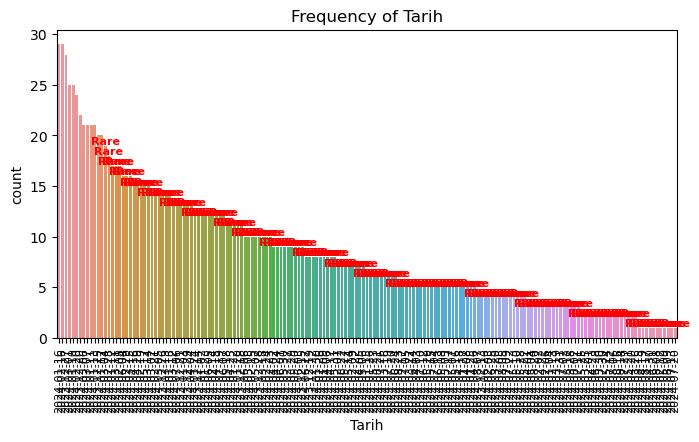

CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik ve numerik değişkenleri ayır
categorical_columns = merged_df.select_dtypes(include=['object']).columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Eşik değeri (threshold) belirleyin
threshold = 20

# Nadir kategorileri saklamak için bir liste oluşturun
rare_categories_list = []

# Kategorik değişkenlerin frekans grafikleri ve nadir kategorilerin işaretlenmesi
for col in categorical_columns:
    plt.figure(figsize=(8, 4))  # Daha küçük bir grafik boyutu ayarlayın
    value_counts = df_filtered_no_outlier[col].value_counts()
    sns.countplot(x=col, data=df_filtered_no_outlier, order=value_counts.index)
    
    # Nadir kategorileri işaretle ve listeye ekle
    rare_categories = value_counts[value_counts < threshold]
    for rare_cat in rare_categories.index:
        print(f"'{col}' kolonunda '{rare_cat}'  fkategorisi sadece {rare_categories[rare_cat]} kez tekrar ediyor.")
        plt.text(x=list(value_counts.index).index(rare_cat), y=rare_categories[rare_cat] + 0.1, s='Rare', 
                 color='red', ha='center', fontsize=8, fontweight='bold')
        
        # Nadir kategoriyi ve kaç kez tekrar ettiğini bir DataFrame olarak kaydet
        rare_categories_list.append({
            'Column': col,
            'Category': rare_cat,
            'Frequency': rare_categories[rare_cat]
        })
    
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=90, fontsize=8)  # Kolon isimlerini dik (90 derece) ve küçük fontta yazdır
    plt.show()

# Nadir kategorileri içeren DataFrame oluşturun
rare_categories_df = pd.DataFrame(rare_categories_list)

# 1. CSV: Kolon, Kategori (Sayısal ise küçükten büyüğe, alfabetik sıralı), Frequency'e göre sıralı
# Kategoriyi önce sayısal ise küçükten büyüğe, sonra alfabetik olarak sıralayın
rare_categories_df['Category_Sorted'] = rare_categories_df['Category'].apply(lambda x: (float(x) if x.replace('.', '', 1).isdigit() else x))

sorted_by_column_category = rare_categories_df.sort_values(by=['Column', 'Category_Sorted', 'Frequency'])
sorted_by_column_category.to_csv('hata_adedisorted_by_column_category.csv', index=False)

# 2. CSV: Önce Frequency'e, sonra Kolon ve Kategori'ye göre sıralı
sorted_by_frequency = rare_categories_df.sort_values(by=['Frequency', 'Column', 'Category_Sorted'])
sorted_by_frequency.to_csv('hata_adedi_sorted_by_frequency.csv', index=False)

print("CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'")


### Outlier'lar Temizlendikten Sonra Sayısal Değişkenlerin Grafikleri

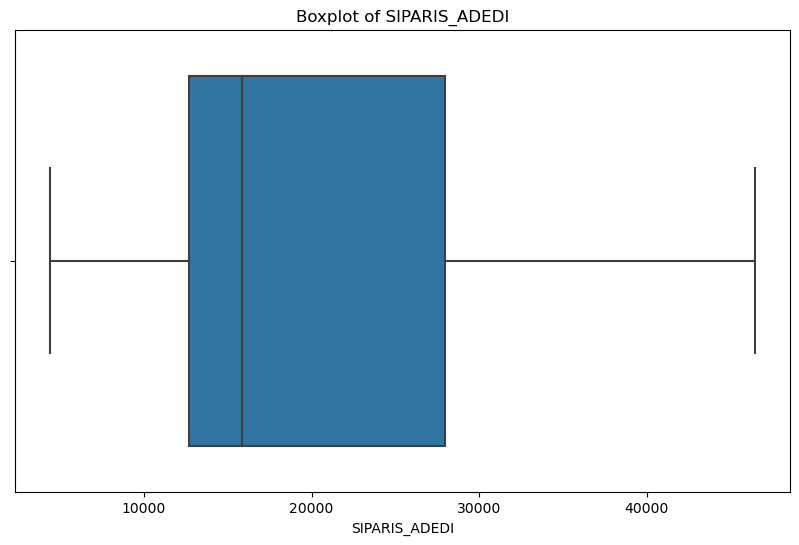

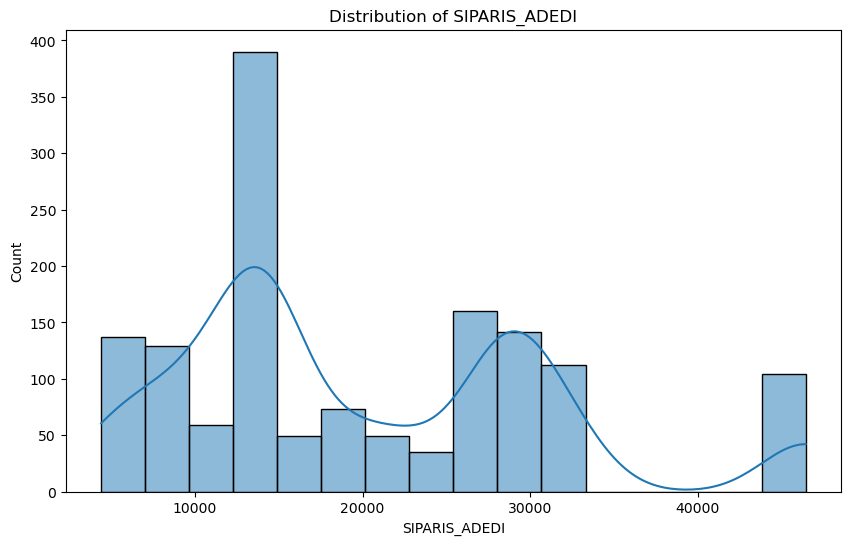

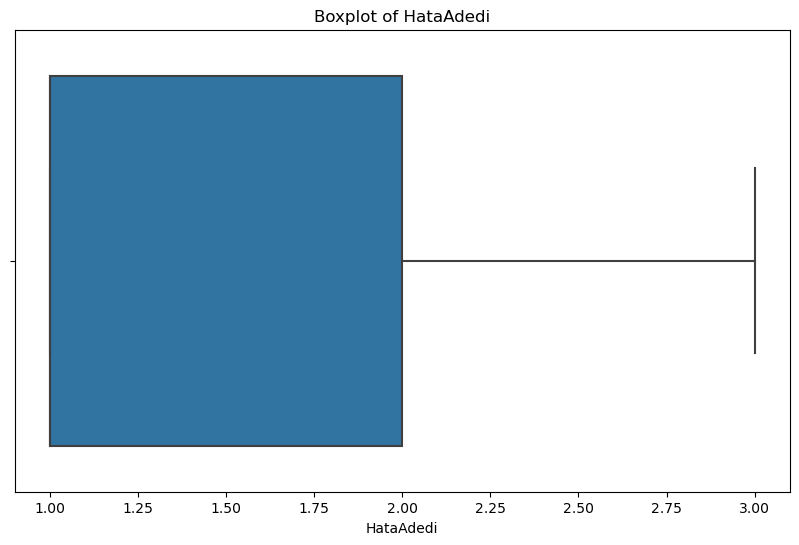

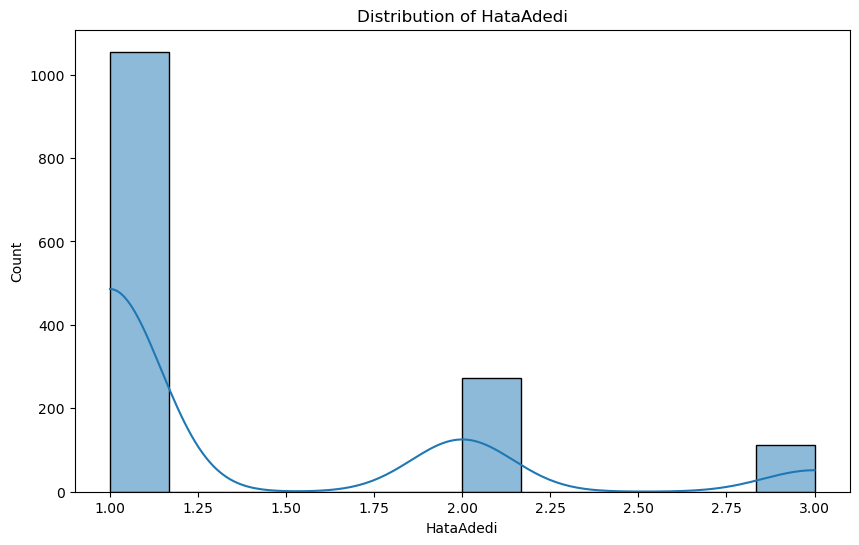

In [29]:

# Numerik değişkenlerin boxplot ve dağılım grafiklerini çiz
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_filtered_no_outlier[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    # Dağılım grafiği
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtered_no_outlier[col], kde=True, bins='auto')
    plt.title(f'Distribution of {col}')
    plt.show()


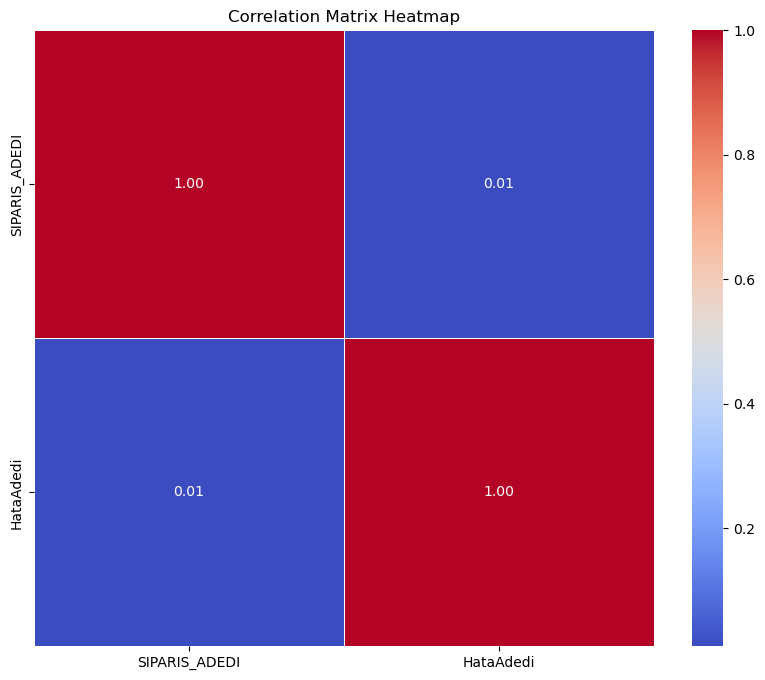

In [78]:
numerical_data_2 = df_filtered_no_outlier.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplayalım
correlation_matrix = numerical_data_2.corr()

# Isı haritasını çizelim
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Ek Çalışmalar

In [79]:
#Outlierlar atıldıktan sonra HataAdedi dağılım testleri-1
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# HataAdedi verisini al
data = df_filtered_no_outlier['HataAdedi']

# Poisson dağılımı için uygunluk testi
poisson_lambda = np.mean(data)
poisson_test = stats.kstest(data, 'poisson', args=(poisson_lambda,))

# Binom dağılımı için uygunluk testi
n = data.max()  # binom için n parametresi belirlenir
p = poisson_lambda / n  # ortalama (λ) ile p parametresi hesaplanır
binom_test = stats.kstest(data, 'binom', args=(n, p))

# Geometrik dağılım için uygunluk testi
p_geom = 1 / (np.mean(data) + 1)  # Geometrik dağılım için p parametresi
geometric_test = stats.kstest(data, 'geom', args=(p_geom,))

# Negatif Binom dağılımı için uygunluk testi
mean = np.mean(data)
var = np.var(data)
r = mean**2 / (var - mean)  # negatif binom için r parametresi
p_neg_binom = mean / var  # negatif binom için p parametresi
neg_binom_test = stats.kstest(data, 'nbinom', args=(r, p_neg_binom))

# Sonuçları yazdır
print(f"Poisson Dağılımı Uygunluk Testi: p-değeri = {poisson_test.pvalue}")
print(f"Binom Dağılımı Uygunluk Testi: p-değeri = {binom_test.pvalue}")
print(f"Geometrik Dağılım Uygunluk Testi: p-değeri = {geometric_test.pvalue}")
print(f"Negatif Binom Dağılımı Uygunluk Testi: p-değeri = {neg_binom_test.pvalue}")

Poisson Dağılımı Uygunluk Testi: p-değeri = 0.0
Binom Dağılımı Uygunluk Testi: p-değeri = 0.0
Geometrik Dağılım Uygunluk Testi: p-değeri = 4.348394788515432e-238
Negatif Binom Dağılımı Uygunluk Testi: p-değeri = nan


In [80]:
#Outlierlar atıldıktan sonra HataAdedi dağılım testleri-2
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Veriyi al
data = df_filtered_no_outlier['HataAdedi']

# Genelleştirilmiş Pareto Dağılımı için uygunluk testi
params_gpd = stats.genpareto.fit(data)
gpd_test = stats.kstest(data, 'genpareto', args=params_gpd)

# Lognormal Dağılımı için uygunluk testi
params_lognorm = stats.lognorm.fit(data, floc=0)
lognorm_test = stats.kstest(data, 'lognorm', args=params_lognorm)

# Weibull Dağılımı için uygunluk testi
params_weibull = stats.weibull_min.fit(data, floc=0)
weibull_test = stats.kstest(data, 'weibull_min', args=params_weibull)

# Pareto Dağılımı için uygunluk testi
params_pareto = stats.pareto.fit(data, floc=0)
pareto_test = stats.kstest(data, 'pareto', args=params_pareto)

# Sonuçları yazdır
print(f"Genelleştirilmiş Pareto Dağılımı Uygunluk Testi: p-değeri = {gpd_test.pvalue}")
print(f"Lognormal Dağılımı Uygunluk Testi: p-değeri = {lognorm_test.pvalue}")
print(f"Weibull Dağılımı Uygunluk Testi: p-değeri = {weibull_test.pvalue}")
print(f"Pareto Dağılımı Uygunluk Testi: p-değeri = {pareto_test.pvalue}")


Genelleştirilmiş Pareto Dağılımı Uygunluk Testi: p-değeri = 9.898587105872507e-263
Lognormal Dağılımı Uygunluk Testi: p-değeri = 1.6036614621278632e-270
Weibull Dağılımı Uygunluk Testi: p-değeri = 1.9779627282220223e-228
Pareto Dağılımı Uygunluk Testi: p-değeri = 0.0


In [95]:
#Poisson Dağılımı için ortalama ve varyans kontrolü

# HataAdedi sütununun ortalamasını hesapla
mean_hataadedi = df_filtered['HataAdedi'].mean()

# HataAdedi sütununun varyansını hesapla
variance_hataadedi = df_filtered['HataAdedi'].var()

# HataAdedi sütununun standart sapmasını hesapla
std_hataadedi = df_filtered['HataAdedi'].std()

print(f"HataAdedi Sütununun Ortalaması: {mean_hataadedi}")
print(f"HataAdedi Sütununun Varyansı: {variance_hataadedi}")
print(f"HataAdedi Sütununun Standart Sapması: {std_hataadedi}")

print(variance_hataadedi/mean_hataadedi)

HataAdedi Sütununun Ortalaması: 1.3446838082001389
HataAdedi Sütununun Varyansı: 0.38180586309647885
HataAdedi Sütununun Standart Sapması: 0.617904412588613
0.2839372801012057


In [82]:
# HataAdedi sütununun ortalaması ve varyansı
mean_hataadedi = 130.34265734265733
variance_hataadedi = 148099.7005059732

# Negatif Binom dağılımı için theta ve n parametrelerini hesapla
theta = mean_hataadedi**2 / (variance_hataadedi - mean_hataadedi)
n_param = mean_hataadedi / theta

print(f"Negatif Binom Dağılımı için Theta (θ): {theta}")
print(f"Negatif Binom Dağılımı için n: {n_param}")

# Kolmogorov-Smirnov testi ile Negatif Binom dağılımına uygunluk testi
data = df_filtered['HataAdedi']

# Burada negatif binom dağılımı için başarı olasılığı (p) şu şekilde hesaplanır:
p_param = theta / (theta + mean_hataadedi)

d_statistic, p_value = stats.kstest(data, 'nbinom', args=(n_param, p_param))

print(f"K-S Test İstatistiği: {d_statistic}")
print(f"P-Değeri: {p_value}")

if p_value < 0.05:
    print("Veri seti Negatif Binom dağılımına uymuyor (H0 reddedildi).")
else:
    print("Veri seti Negatif Binom dağılımına uyuyor (H0 kabul edildi).")

Negatif Binom Dağılımı için Theta (θ): 0.11481571975547113
Negatif Binom Dağılımı için n: 1135.2335518189907
K-S Test İstatistiği: 1.0
P-Değeri: 0.0
Veri seti Negatif Binom dağılımına uymuyor (H0 reddedildi).


In [83]:
import numpy as np
from scipy import stats

# HataAdedi sütununun ortalamasını ve varyansını hesaplayın
mean_hataadedi = np.mean(df_filtered['HataAdedi'])
variance_hataadedi = np.var(df_filtered['HataAdedi'], ddof=1)

# Negatif Binom dağılımı için theta ve n parametrelerini hesapla
theta = mean_hataadedi**2 / (variance_hataadedi - mean_hataadedi)
n_param = mean_hataadedi / theta

# Başarı olasılığı (p) hesaplama
p_param = theta / (theta + mean_hataadedi)

print(f"Negatif Binom Dağılımı için Theta (θ): {theta}")
print(f"Negatif Binom Dağılımı için n (deneme sayısı): {n_param}")
print(f"Negatif Binom Dağılımı için p (başarı olasılığı): {p_param}")


Negatif Binom Dağılımı için Theta (θ): 0.28617265148058274
Negatif Binom Dağılımı için n (deneme sayısı): 8.360458643835566
Negatif Binom Dağılımı için p (başarı olasılığı): 0.1068323720076004
